In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv(r'HR.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
df.Department.unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [5]:
df.salary.unique()

array(['low', 'medium', 'high'], dtype=object)

In [6]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [7]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

In [8]:
df.Department = label.fit_transform(df.Department)

In [10]:
df.salary= label.fit_transform(df.salary)

In [11]:
x = df.drop("salary",axis = 1)
y = df.salary

In [13]:
df.shape

(14999, 10)

In [17]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test  =  train_test_split(x,y,test_size = 0.2,random_state = 0)

In [19]:
x_train.shape

(11999, 9)

In [20]:
x_test.shape

(3000, 9)

In [21]:
from sklearn.tree import DecisionTreeClassifier

gungun = DecisionTreeClassifier()
gungun.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [22]:
gungun.score(x_train,y_train)

0.9992499374947912

In [23]:
gungun.score(x_test,y_test)

0.604

In [27]:
prediction = gungun.predict(x_test)

In [25]:
y_test

1670     2
13378    2
10233    2
4719     1
7003     1
        ..
14035    2
8469     2
12453    2
9431     1
4202     2
Name: salary, Length: 3000, dtype: int32

In [28]:
from sklearn.metrics import confusion_matrix

In [29]:
cm = confusion_matrix(y_test,prediction)
cm

array([[ 90,  71,  96],
       [ 82, 966, 403],
       [115, 421, 756]], dtype=int64)

In [30]:
import seaborn as sn

Text(33.0, 0.5, 'Truth')

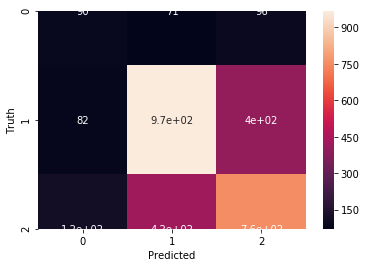

In [32]:
# plt.figure(figsize=(10,7))
sn.heatmap(cm,annot = True)
plt.xlabel("Predicted")
plt.ylabel("Truth")